<a href="https://colab.research.google.com/github/ddiaz1999/Face_Mask_Detection_System/blob/master/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <strong>Face Mask Detection</strong>

*   **<font color='red'> Problema </font>** 
##### Detectar y clasificar la postura de una mascarilla sanitaria dentro de 3 clases.

<br>
<h6 align=center><b> ${\text{Tabla 1. Clases}}$ </b><h6>

|         ${\text{Class}}$         |      ${\text{Color Label}}$     |
|:--------------------------------:|:-------------------------------:|
|       ${\text{with mask}}$       |  $\color{green}{\text{green}}$  |
|     ${\text{without mask}}$      |    $\color{red}{\text{red}}$    |
| ${\text{mask weared incorrect}}$ | $\color{orange}{\text{orange}}$ |
<br>

*   **<font color='red'> Dataset </font>** 
##### El *dataset* es tomado de [<font color='purple'><i>**Kaggle**<i></font>](https://www.kaggle.com/), estos datos son de dominio público. [<font color='blue'><i>**Ver dataset**<i></font>](https://www.kaggle.com/andrewmvd/face-mask-detection)
<br>

---
---

#####Desarrollado por: 
<h6 align=center> ${\text{Jhon Hader Fernández}}$ <h6>
<h6 align=center> ${\text{Diego Fernando Díaz}}$ <h6>
<h6 align=center> ${\text{Oscar Geovanny Baracaldo}}$ <h6>

#####<h6 align=center>{<i>jhon_fernandez, di-diego, obaracaldo</i>}@javeriana.edu.co<h6>
#####<h6 align=center>Pontificia Universidad Javeriana<h6>

<br>

## ***1. ENTORNO DE TRABAJO***

Para el desarrollo del sistema se requiere de algunos paquetes, módulos y librerías externas.

### ***1.1.  INSTALACIÓN DE PAQUETES EXTERNOS*** 

In [ ]:
!pip install xmltodict
!pip install tensorflow

### ***1.2.  IMPORTAR PAQUETES Y LIBRERÍAS*** 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xmltodict
import time
import cv2
import os

from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from prettytable import PrettyTable

## ***2. ANÁLISIS DE DATOS***

Inicialmente se debe hacer un análisis exploratorio de los datos, que darán información sobre el tipo de datos, la cantidad, los formatos de archivos, etc.

### ***2.1.  OBTENER DATASET*** 

In [ ]:
path = '/content/drive/My Drive/Face Mask Detection/dataset'
folders = {'annotations':'annotations/', 'images':'images/'}

path_annotations = os.path.join(path, folders['annotations'])
path_images = os.path.join(path, folders['images'])

images_names = []
xml_names = []

for dirname, _, filenames in os.walk(path):
  if dirname == os.path.join(path, 'annotations') or dirname == os.path.join(path, 'images'):
    for filename in filenames:
      if os.path.join(dirname, filename)[-3:] == "png":
        images_names.append(filename)
      else:
        xml_names.append(filename)


print('Face Mask Detection: Dataset description')
chart = PrettyTable(["Folder", "Files amount", "format"])
chart.add_row([folders['annotations'][:-1], len(xml_names), xml_names[0][-3:]])
chart.add_row([folders['images'][:-1], len(images_names), images_names[0][-3:]])
print(chart,  '\n')


Face Mask Detection: Dataset description
+-------------+--------------+--------+
|    Folder   | Files amount | format |
+-------------+--------------+--------+
| annotations |     853      |  xml   |
|    images   |     853      |  png   |
+-------------+--------------+--------+ 



### ***2.2.  CONVERTIR UN ARCHIVO XML A DICCIONARIO*** 
A continuación se muestra un ejemplo de cómo convertir un archivo de tipo <font color='blue'>**`xml`**</font> en un diccionario (<font color='blue'>**`dict`**</font>). Este proceso es requerido para realizar todo el tratamiento de datos y mas adelante se utilizará bastante.

In [ ]:
image_test = images_names[1]

with open(path_annotations + image_test[:-4] + '.xml') as annotation:
    doc = xmltodict.parse(annotation.read())

print('Dictionary obtained from xml file:\n\n')
doc

Dictionary obtained from xml file:




OrderedDict([('annotation',
              OrderedDict([('folder', 'images'),
                           ('filename', 'maksssksksss455.png'),
                           ('size',
                            OrderedDict([('width', '301'),
                                         ('height', '400'),
                                         ('depth', '3')])),
                           ('segmented', '0'),
                           ('object',
                            OrderedDict([('name', 'without_mask'),
                                         ('pose', 'Unspecified'),
                                         ('truncated', '0'),
                                         ('occluded', '0'),
                                         ('difficult', '0'),
                                         ('bndbox',
                                          OrderedDict([('xmin', '115'),
                                                       ('ymin', '222'),
                                                

### ***2.3.  VER CLASES DISPONIBLES EN LOS DATOS*** 
Se revisa qué clases hay en todos los datos, debe ser consistente con el planteamiento inicial (***ver Tabla 1***)

In [ ]:
listing=[]

for idx, img in enumerate(images_names[0:6]):
  with open(path_annotations + img[:-4] + ".xml") as annotation:
    doc = xmltodict.parse(annotation.read())

  temp = doc['annotation']['object']

  if type(temp) == list:
    for i in range(len(temp)):
      listing.append(temp[i]['name'])
  else:
    listing.append(temp['name'])

  clear_output(wait=True)
  print('Loading images...')
  print('Image ' + str(idx + 1) + ' of ' + str(len(images_names[0:6])))
  time.sleep(0.005)
print('These were some sample images to see classes')
time.sleep(3)

clear_output(wait=True)
listing = set(listing)

print('Classes available in dataset:', '\n')
listing

Classes available in dataset: 



{'mask_weared_incorrect', 'with_mask', 'without_mask'}

### ***2.4.  ASIGNAR UNA ETIQUETA DE COLOR A CADA CLASE*** 

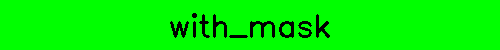

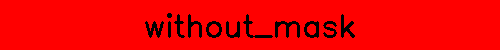

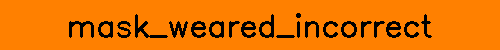

In [ ]:
classes_color = {'with_mask' : (0, 255, 0), 
                 'without_mask' : (0, 0, 255),
                 'mask_weared_incorrect' : (0, 128, 255)}

font, fontScale, thickness = cv2.FONT_HERSHEY_SIMPLEX, 1, 2
color = (0, 0, 0) 

for i, l in enumerate(classes_color):
  colors = np.ones((50, 500, 3), dtype=np.int16)
  colors *= classes_color[l]
  (label_width, label_height), baseline = cv2.getTextSize(l, font, fontScale, thickness)
  org = ((colors.shape[1]//2) - label_width//2, (colors.shape[0]//2) + label_height//2)
  colors = cv2.putText(colors, l, org, font, fontScale, color, thickness) 
  cv2_imshow(colors)

### ***2.5.  DIBUJAR OBJETOS EN IMÁGENES*** 
La función <font color='blue'>**`draw_bounding_box`**</font> dibuja un cuadro en los <font color='yellowgreen'>**objetos***</font> de interés.

<font color='yellowgreen'>**objetos**</font>: Se define como un rostro con alguna clase de interés (***ver Tabla 1***)



In [ ]:
def draw_bounding_box(input_image):
  with open(path_annotations + input_image[:-4] + ".xml") as annotation:
    doc = xmltodict.parse(annotation.read())
  temp = doc["annotation"]["object"]

  img = cv2.imread(os.path.join(path_images, input_image))

  if type(temp) == list:
    for i in range(len(temp)):

      if temp[i]["name"] == "with_mask":
        x_min, y_min, x_max, y_max = list(map(int,temp[i]["bndbox"].values()))
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), classes_color['with_mask'], 1)

      elif temp[i]["name"] == "without_mask":
        x_min, y_min, x_max, y_max = list(map(int,temp[i]["bndbox"].values()))
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), classes_color['without_mask'], 1)

      elif temp[i]["name"] == "mask_weared_incorrect":
        x_min, y_min, x_max, y_max = list(map(int,temp[i]["bndbox"].values()))
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), classes_color['mask_weared_incorrect'], 1)

      else:
        print('WARNING: Picture ' + input_image + ' has a invalid class!')
    
  else:
    x_min, y_min, x_max, y_max = list(map(int,temp["bndbox"].values()))
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), classes_color[temp["name"]], 1)
    temp = [0]

  print('Image: '+ input_image)
  print('Objects: ' + str(len(temp)))
  cv2_imshow(img)
  print('\n')

Image: maksssksksss451.png
Objects: 13


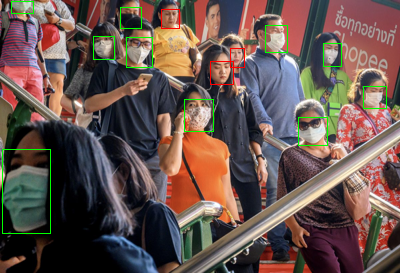



Image: maksssksksss455.png
Objects: 1


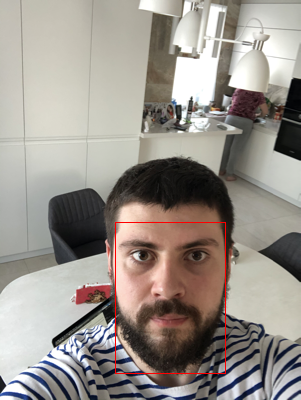



Image: maksssksksss456.png
Objects: 1


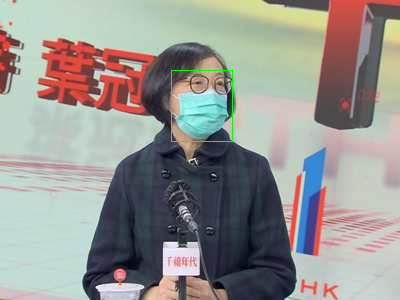

In [ ]:
number_of_images_to_draw = 3

for i in range(0, number_of_images_to_draw): 
  draw_bounding_box(images_names[i])

### ***2.5.  OBTENER LA MÁXIMA CANTIDAD DE OBJETOS***

Es importante obtener la máxima cantidad de objetos del *dataset*, es decir, habrá una o varias imágenes con un número máximo de objetos (con varias clases contenidas) es de interés conocer este número.


In [ ]:
def max_objects(images, verbose=False):
  number_of_objects = []
  for idx, img in enumerate(images):
    with open(path_annotations + img[:-4] + ".xml") as annotation:
      doc = xmltodict.parse(annotation.read())
    temp = doc['annotation']['object']
    number_of_objects.append(len(temp))
  
    if verbose:
      clear_output(wait=True)
      print('Loading images...')
      print('Image ' + str(idx + 1) + ' of ' + str(len(images)))
      time.sleep(0.01)
  
  clear_output(wait=True)
  return(max(number_of_objects))

print('Maximum number of objects is: ' + str(max_objects(images_names, verbose=True)))

Maximum number of objects is: 115


## ***3. PRE-PROCESAMIENTO DE DATOS***
Se debe ajustar y acondicionar los datos a los requerimientos del modelo.

### ***3.1.  OBTENER EL MARCO DE DATOS***

Se obtiene el *dataframe*.

In [ ]:
def get_dataFrame(images):

  dic = {"Image":[], "Dimensions":[]}
  max = max_objects(images)

  for i in range(0, max):
    dic['object'+str(i)] = []

  for idx, img in enumerate(images):
    with open(path_annotations + img[:-4] + ".xml") as annotation:
      doc = xmltodict.parse(annotation.read())

    temp = doc['annotation']['object']
    dic['Image'].append(img)
    (width, height, depth) = list(map(int,doc['annotation']['size'].values()))
    dic['Dimensions'].append((width, height, depth))

    if type(temp) == list:
      for i in range(len(temp)):
        x_min, y_min, x_max, y_max = list(map(int,temp[i]['bndbox'].values()))
        dic['object'+str(i)].append([temp[i]['name'], (x_min, y_min), (x_max, y_max)])
      for i in range (len(temp), max):
        dic['object'+str(i)].append(0)
    else:
      x_min, y_min, x_max, y_max = list(map(int,temp['bndbox'].values()))
      dic['object'+str(0)].append([temp['name'], (x_min, y_min), (x_max, y_max)])
      for i in range (1, max):
        dic['object'+str(i)].append(0)

    clear_output(wait=True)
    print('Loading images...')
    print('Image ' + str(idx + 1) + ' of ' + str(len(images)))
    time.sleep(0.01)
  
  clear_output(wait=True)
  return(pd.DataFrame(dic))

In [ ]:
df = get_dataFrame(images_names)

print('Dataframe dimensions: ' + str(df.shape) + '\n')
df.head()

Dataframe dimensions: (853, 117)



,Image,Dimensions,object0,object1,object2,object3,object4,object5,object6,object7,object8,object9,object10,object11,object12,object13,object14,object15,object16,object17,object18,object19,object20,object21,object22,object23,object24,object25,object26,object27,object28,object29,object30,object31,object32,object33,object34,object35,object36,object37,...,object75,object76,object77,object78,object79,object80,object81,object82,object83,object84,object85,object86,object87,object88,object89,object90,object91,object92,object93,object94,object95,object96,object97,object98,object99,object100,object101,object102,object103,object104,object105,object106,object107,object108,object109,object110,object111,object112,object113,object114
0,maksssksksss451.png,"(400, 273, 3)","[with_mask, (11, 1), (33, 13)]","[with_mask, (120, 7), (141, 28)]","[with_mask, (93, 36), (114, 59)]","[without_mask, (161, 9), (179, 28)]","[with_mask, (126, 37), (152, 67)]","[with_mask, (2, 149), (50, 233)]","[without_mask, (230, 48), (244, 67)]","[without_mask, (210, 61), (233, 84)]","[with_mask, (184, 99), (213, 131)]","[with_mask, (265, 25), (287, 52)]","[with_mask, (323, 43), (341, 66)]","[with_mask, (298, 117), (327, 145)]","[with_mask, (363, 86), (386, 108)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,maksssksksss455.png,"(301, 400, 3)","[without_mask, (115, 222), (225, 373)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,maksssksksss456.png,"(400, 300, 3)","[with_mask, (171, 70), (232, 141)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,maksssksksss453.png,"(400, 300, 3)","[without_mask, (2, 56), (16, 74)]","[without_mask, (18, 46), (37, 67)]","[without_mask, (46, 46), (59, 62)]","[without_mask, (50, 60), (59, 82)]","[without_mask, (19, 109), (32, 127)]","[with_mask, (26, 140), (49, 169)]","[mask_weared_incorrect, (47, 172), (71, 203)]","[without_mask, (97, 273), (131, 300)]","[without_mask, (108, 7), (120, 22)]","[without_mask, (111, 39), (127, 60)]","[without_mask, (133, 51), (146, 73)]","[without_mask, (147, 55), (159, 77)]","[without_mask, (97, 104), (114, 124)]","[with_mask, (124, 148), (143, 175)]","[with_mask, (158, 147), (175, 173)]","[without_mask, (193, 54), (206, 71)]","[without_mask, (208, 54), (219, 72)]","[with_mask, (229, 64), (241, 93)]","[without_mask, (261, 26), (279, 53)]","[without_mask, (296, 39), (310, 58)]","[with_mask, (344, 34), (365, 61)]","[with_mask, (339, 77), (359, 111)]","[without_mask, (108, 10), (122, 22)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,maksssksksss454.png,"(400, 278, 3)","[with_mask, (143, 97), (255, 211)]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### ***3.2.  BALANCE***

Ver el balance de los datos.

In [ ]:
def get_balance(df):

  objects = df.columns.tolist()[2:]
  tags = []
  balance = {}

  for features in objects:
    series = df[features]
    for i in range(df.shape[0]):
      if series[i] != 0:
        tags.append(series[i][0])   

  balance['with_mask'] = tags.count('with_mask')
  balance['without_mask'] = tags.count('without_mask')
  balance['mask_weared_incorrect'] = tags.count('mask_weared_incorrect')

  balance['% with_mask'] = (balance['with_mask'] * 100.0) / len(tags)
  balance['% without_mask'] = (balance['without_mask'] * 100.0) / len(tags)
  balance['% mask_weared_incorrect'] = (balance['mask_weared_incorrect'] * 100.0) / len(tags)

  labels = 'with_mask', 'without_mask', 'mask_weared_incorrect'
  sizes = [balance['% with_mask'], balance['% without_mask'], balance['% mask_weared_incorrect']]
  colors = ['yellowgreen', 'crimson', 'orangered']
  explode = (0.1, 0.1, 0.0)

  fig, ax1 = plt.subplots(figsize = (18,9)) 
  ax1.pie(sizes, explode=explode, colors=colors, startangle=90, autopct='%.1f%%', pctdistance=0.85, shadow = True, textprops=dict(fontsize=17)) 
  plt.title('Data balance', fontsize=18, color='red') 
  ax1.legend(labels, title="Classes", loc='upper left', fontsize=12) 
  plt.tight_layout() 
  plt.show()

  chart = PrettyTable(["Class", "Amount", "Percentage %"])
  chart.add_row(['with_mask', balance['with_mask'], round(balance['% with_mask'],2)])
  chart.add_row(['without_mask', balance['without_mask'], round(balance['% without_mask'],2)])
  chart.add_row(['mask_weared_incorrect', balance['mask_weared_incorrect'], round(balance['% mask_weared_incorrect'],2)])
  chart.add_row(['---------------------','-----','------------'])
  chart.add_row(['Total', len(tags), 100])
  print(chart,  '\n')

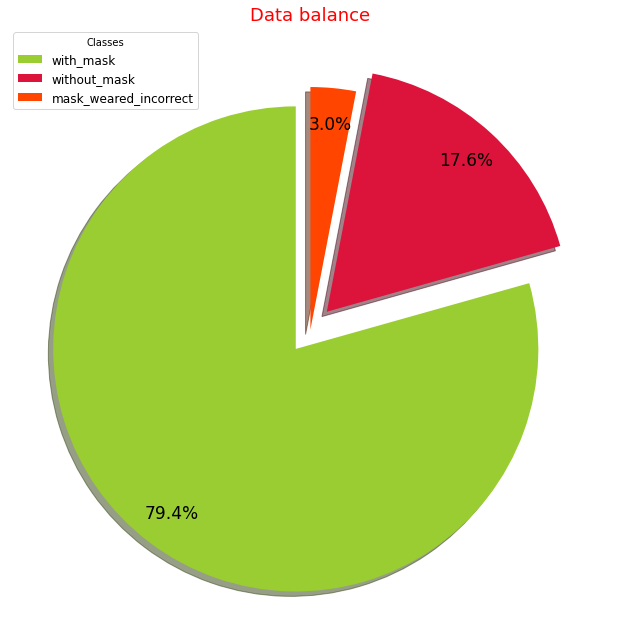

+-----------------------+--------+--------------+
|         Class         | Amount | Percentage % |
+-----------------------+--------+--------------+
|       with_mask       |  3232  |    79.37     |
|      without_mask     |  717   |    17.61     |
| mask_weared_incorrect |  123   |     3.02     |
| --------------------- | -----  | ------------ |
|         Total         |  4072  |     100      |
+-----------------------+--------+--------------+ 



In [ ]:
get_balance(df)

### ***3.3.  SEPARAR DATOS Y ETIQUETAS***

Se debe separar los datos y obtener su respectiva etiqueta (clase), para ello se extraen todos los objetos de cada imágen.

In [ ]:
classes = ['with_mask', 'without_mask', 'mask_weared_incorrect']

def get_data(df, threshold=32):

  data = []
  labels = []

  for idx, image in enumerate(df['Image'][:]):

    img = cv2.imread(path_images + image)

    for obj in (df.columns[2:]):
      info = df[obj][idx]

      if info != 0:
        init_coor, end_coor = info[1:]
        x_min, y_min = init_coor[0], init_coor[1] 
        x_max, y_max = end_coor[0], end_coor[1] 
        
        if (x_max-x_min >= threshold) and (y_max-y_min >= threshold):
          face = img[y_min:y_max, x_min:x_max]
          face = cv2.resize(face, (224, 224))
          data.append(face)
          labels.append(info[0])

    clear_output(wait=True)
    print('Getting data and labels...')
    print('Image ' + str(idx + 1) + ' of ' + str(df.shape[0]))
  
  clear_output(wait=True)        
  print('Data and labels was obtained successfully!')
  time.sleep(4)
  clear_output(wait=True)  
  return data, labels

In [ ]:
def get_new_dataset():

  data1 = []
  labels1 = []
  l = 0
  ii = 0
  valid = False

  print('Getting data and labels...')

  for dirname, _, filenames in os.walk(path):

    if dirname == os.path.join(path,classes[0]):    
      valid = True
      l = 0
    if dirname == os.path.join(path,classes[1]):
      valid = True
      l = 1
    if dirname == os.path.join(path,classes[2]):
      valid = True
      l = 2
    
    if valid:
      ii += 1
      for i, filename in enumerate(filenames):
          
          img = cv2.imread(os.path.join(dirname, filename))
          img = cv2.resize(img, (224, 224))
          data1.append(img)
          labels1.append(classes[l])
          clear_output(wait=True)
          print('Loading folder', ii, 'of 3:', classes[l])
          print('Image', i, 'of', len(filenames))    
    valid = False
    
  clear_output(wait=True)        
  print('Data and labels was obtained successfully!')
  time.sleep(3)
  clear_output(wait=True)
  return data1, labels1

In [ ]:
data, labels = get_data(df, threshold=64)
time.sleep(3)
data1, labels1 = get_new_dataset()

clear_output(wait=True)
print('Both datasets was joined!')
time.sleep(3)

data += data1
labels += labels1

#clear_output(wait=True)
print('Data Description')
chart = PrettyTable(["File", "Amount"])
chart.add_row(['data', len(data)])
chart.add_row(['labels', len(labels)])
print(chart,  '\n')

Both datasets was joined!
Data Description
+--------+--------+
|  File  | Amount |
+--------+--------+
|  data  |  6253  |
| labels |  6253  |
+--------+--------+ 



### 6.6666 Another blah

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = np.array(labels)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)

x_t = np.array(data)
y_t = np.array(labels) 

print(x_t.shape)
print(y_t.shape)

aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

X_train = aug.flow(x_t, y_t, batch_size=32)

### 3.3333 tested

In [ ]:
labels = ['without_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 
          'mask_weared_incorrect', 'with_mask', 'with_mask', 'without_mask']

print(sorted(list(set(labels))))
print(labels[200:210])

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = np.array(labels)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded[200:210])

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)
print(labels[200:210])

In [ ]:
mlb.classes_


array(['mask_weared_incorrect', 'with_mask', 'without_mask'], dtype=object)

### blah

In [ ]:
balance = {}

balance['with_mask'] = labels.count('with_mask')
balance['without_mask'] = labels.count('without_mask')
balance['mask_weared_incorrect'] = labels.count('mask_weared_incorrect')

balance['% with_mask'] = (balance['with_mask'] * 100.0) / len(labels)
balance['% without_mask'] = (balance['without_mask'] * 100.0) / len(labels)
balance['% mask_weared_incorrect'] = (balance['mask_weared_incorrect'] * 100.0) / len(labels)


labels = 'with_mask', 'without_mask', 'mask_weared_incorrect'
sizes = [balance['% with_mask'], balance['% without_mask'], balance['% mask_weared_incorrect']]
colors = ['yellowgreen', 'crimson', 'orangered']
explode = (0.03, 0.03, 0.03)

fig, ax1 = plt.subplots(figsize = (18,9)) 
ax1.pie(sizes, explode=explode, colors=colors, startangle=90, autopct='%.1f%%', pctdistance=0.7, shadow = True, textprops=dict(fontsize=20)) 
plt.title('Data balance', fontsize=18, color='red') 
ax1.legend(labels, title="Classes", loc='upper left', fontsize=12) 
plt.tight_layout() 
plt.show()

chart = PrettyTable(["Class", "Amount", "Percentage %"])
chart.add_row(['with_mask', balance['with_mask'], round(balance['% with_mask'],2)])
chart.add_row(['without_mask', balance['without_mask'], round(balance['% without_mask'],2)])
chart.add_row(['mask_weared_incorrect', balance['mask_weared_incorrect'], round(balance['% mask_weared_incorrect'],2)])
chart.add_row(['---------------------','-----','------------'])
chart.add_row(['Total', len(labels), 100])
print(chart,  '\n')

### ***3.4.  VISUALIZAR DATOS Y ETIQUETAS***

Observar algunos datos y sus respectiva etiqueta, además de mostrar la imágen original.

In [ ]:
def print_data(data, no_of_images):
  temp_prev = 0
  for image in (images_names[0:no_of_images]):
      
    with open(path_annotations + image[:-4] + ".xml") as annotation:
      doc = xmltodict.parse(annotation.read())
    temp = doc['annotation']['object']
    
    if type(temp) != list:
      temp = [0]  

    temp = len(temp)
    draw_bounding_box(image)

    for idx in range(temp_prev, temp_prev+temp):
      print('Object: ' + str((idx - temp_prev) + 1), ' --  Class: ' + labels[idx])
      cv2_imshow(data[idx])
    temp_prev += temp
    
    print('\n---------------------------------------------------------\n')

In [ ]:
filtered = True
if not(filtered):
  number_of_images_to_show_data_and_labels = 4
  print_data(data, number_of_images_to_show_data_and_labels)

## ***4. MODELO***

[INFO] compiling model...
[INFO] training head...
Epoch 1/2
156/156 [==============================] - 203s 1s/step - loss: 0.6708 - accuracy: 0.4211 - val_loss: 0.5681 - val_accuracy: 0.5148
Epoch 2/2
156/156 [==============================] - 166s 1s/step - loss: 0.5590 - accuracy: 0.5392
[INFO] evaluating network...
                       precision    recall  f1-score   support

mask_weared_incorrect       0.50      0.93      0.65       402
            with_mask       0.60      0.56      0.58       454
         without_mask       0.75      0.16      0.26       395

             accuracy                           0.55      1251
            macro avg       0.62      0.55      0.50      1251
         weighted avg       0.62      0.55      0.50      1251

[INFO] saving mask detector model...


ValueError: ignored

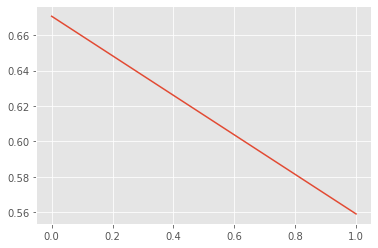

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

INIT_LR = 1e-4
EPOCHS = 2
BS = 32

data = np.array(data)

for idx, img in enumerate(data):
  data[idx] = preprocess_input(np.array(img))

values = np.array(labels)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
labels = onehot_encoder.fit_transform(integer_encoded)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

# construct the training image generator for data augmentation
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

# https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/

# load the MobileNetV2 network, ensuring the head FC layer sets are
# left off
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

# place the head FC model on top of the base model (this will become
# the actual model we will train)
model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")


H = model.fit(
	x=aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=['mask_weared_incorrect', 'with_mask', 'without_mask']))

# serialize the model to disk
print("[INFO] saving mask detector model...")
path_model = r'/content/drive/My Drive/Face Mask Detection'
name_model = "mask_detector.model"

model.save(os.path.join(path_model, name_model), save_format="h5")

# plot the training loss and accuracy
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

## ***6. RESULTADOS***